**Tesla | EDA & Prediction**

In [ ]:
# Tesla Exploratory Data Analysis & Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_csv("/content/TSLA (2).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3378,2023-11-29,249.210007,252.750000,242.759995,244.139999,244.139999,135401300
3379,2023-11-30,245.139999,245.220001,236.910004,240.080002,240.080002,132353200
3380,2023-12-01,233.139999,240.190002,231.899994,238.830002,238.830002,121173500
3381,2023-12-04,235.750000,239.369995,233.289993,235.580002,235.580002,104099800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3383 entries, 0 to 3382
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3383 non-null   object 
 1   Open       3383 non-null   float64
 2   High       3383 non-null   float64
 3   Low        3383 non-null   float64
 4   Close      3383 non-null   float64
 5   Adj Close  3383 non-null   float64
 6   Volume     3383 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 185.1+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3.383000e+03
mean,69.595920,71.139907,67.934383,69.578123,69.578123,9.672717e+07
std,101.016818,103.287828,98.520375,100.941653,100.941653,8.022900e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.422334,10.824666,10.210000,10.544000,10.544000,4.574925e+07
50%,16.866667,17.132668,16.625999,16.879333,16.879333,8.098950e+07
75%,99.818333,102.410663,97.599998,99.872333,99.872333,1.234176e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


Tesla Yearly Close Price Trends

<ipython-input-17-e1ef54f813e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-e1ef54f813e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    Year        Open        High         Low       Close       Volume
0   2010    1.370000    2.428000    1.159333    1.775333   1595250000
1   2011    1.789333    2.333333    1.407333    1.904000   4878526500
2   2012    1.929333    2.663333    1.509333    2.258000   4611735000
3   2013    2.333333   12.966667    2.140667   10.028667  31781188500
4   2014    9.986667   19.427999    9.111333   14.827333  26134819500
5   2015   14.858000   19.110001   12.093333   16.000668  16323267000
6   2016   15.381333   17.955999    9.403333   14.246000  17435425500
7   2017   14.324000   25.974001   14.064000   20.756666  23850471000
8   2018   20.799999   25.830667   16.306000   22.186666  32424582000
9   2019   20.406668   29.020666   11.799333   27.888666  34620726000
10  2020   28.299999  239.573334   23.367332  235.223328  57158737200
11  2021  239.820007  414.496674  179.830002  352.260010  20708071500
12  2022  382.583344  402.666656  108.239998  123.180000  21821019600
13  2023  118.470001

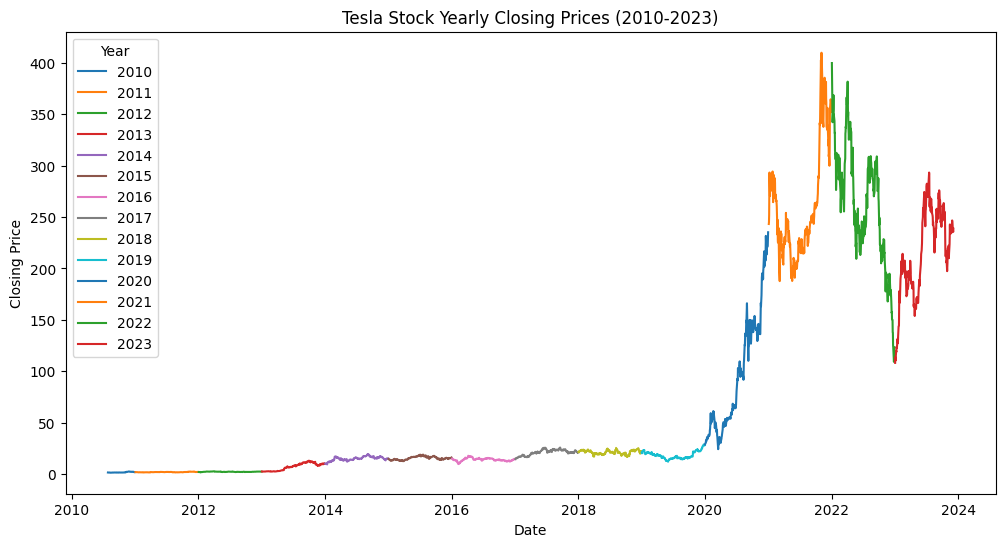

<Figure size 1200x600 with 0 Axes>

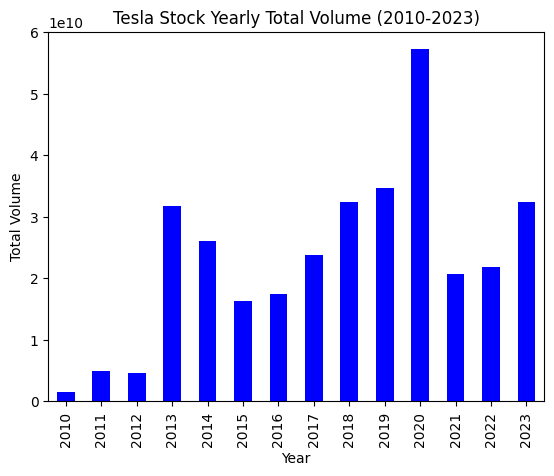

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

yearly_analysis = df.groupby('Year').agg({
    'Open': 'first',# Opening price of the first trading day of the year
    'High': 'max',# Highest price in the year
    'Low': 'min',# Lowest price in the year
    'Close': 'last',# Closing price of the last trading day of the year
    'Volume': 'sum'# Total trading volume in the year
}).reset_index()

print(yearly_analysis)

plt.figure(figsize=(12, 6))
for year, data in df.groupby('Year'):#df.groupby('Year'): Groups the stock data by year.
    plt.plot(data['Date'], data['Close'], label=str(year))#plt.plot(...): Plots the 'Date' vs. 'Close' price for each year.

plt.title('Tesla Stock Yearly Closing Prices (2010-2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Year')
plt.show()


plt.figure(figsize=(12, 6))
yearly_analysis.plot(x='Year', y='Volume', kind='bar', color='blue', legend=False)
plt.title('Tesla Stock Yearly Total Volume (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

Risk Analysis - VaR and CVaR

In [ ]:
# Risk Analysis - VaR and CVaR () Value at Risk (VaR) and Conditional Value at Risk (CVaR)

VaR (95% confidence level):-0.0512
CVaR (95% confidence level): -0.0784


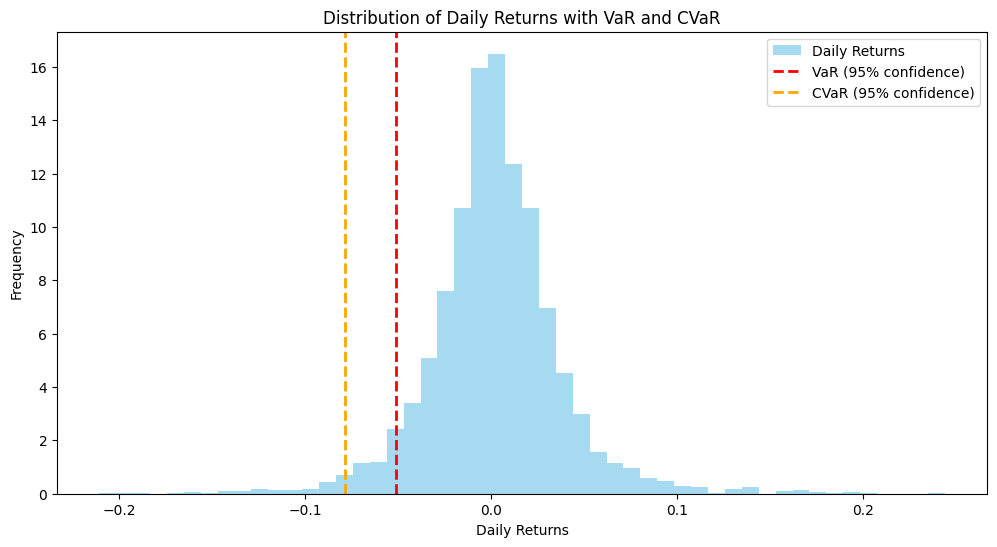

In [ ]:
df['Returns'] = df['Close'].pct_change()# Daily returns
confidence_level = 0.95
var_95 = np.percentile(df['Returns'].dropna(), 100 * (1 - confidence_level))# 5th percentile
cvar_95 = df['Returns'][df['Returns'] <= var_95].mean()# Average of worst 5% returns

print(f"VaR (95% confidence level):{var_95:.4f}")
print(f"CVaR (95% confidence level): {cvar_95:.4f}")

plt.figure(figsize=(12, 6))
plt.hist(df['Returns'].dropna(), bins=50, density=True, alpha=0.75, color='skyblue', label='Daily Returns')
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100:.0f}% confidence)')
plt.axvline(cvar_95, color='orange', linestyle='dashed', linewidth=2, label=f'CVaR ({confidence_level*100:.0f}% confidence)')
plt.title('Distribution of Daily Returns with VaR and CVaR')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Volatility Analysis

In [ ]:
window_size = 20
df['Volatility'] = df['Returns'].rolling(window=window_size).std()

# Plotting volatility using Plotly Express
fig = px.line(df, x='Date', y='Volatility', title='Tesla Stock Volatility Over Time',
              labels={'Volatility': f'Volatility (Rolling {window_size} Days)'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Volatility')
fig.show()

<ipython-input-19-3d3abb8508c5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Seasonal Analysis

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_average = df.groupby(['Month']).agg({'Close': 'mean'}).reset_index()
fig = px.bar(monthly_average, x='Month', y='Close', title='Seasonal Analysis of Tesla Stock',
             labels={'Close': 'Average Closing Price', 'Month': 'Month'})
fig.show()

<ipython-input-12-0e9fdf42f2c5>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Predicting Price Using Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px


# Feature engineering: Use historical prices as features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Create lag features (use past prices as features)
for i in range(1, 6):
    df[f'Close_Lag_{i}'] = df['Close'].shift(i)


df = df.dropna()


features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day',
            'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']
target = 'Close'

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
test_data['Predicted'] = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, test_data['Predicted'])
mae = mean_absolute_error(y_test, test_data['Predicted'])
r2 = r2_score(y_test, test_data['Predicted'])

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

# Plotting actual vs. predicted prices using Plotly
fig = px.line(test_data, x='Date', y=[target, 'Predicted'],
              labels={'value': 'Closing Price', 'variable': 'Data Type'},
              title='Tesla Stock Price Prediction with Random Forest Regressor',
              template='plotly_dark')

fig.show()

Mean Squared Error (MSE): 592.3737773931224
Mean Absolute Error (MAE): 12.185883382035628
R-squared (R2): 0.8240116204888366


<ipython-input-13-962d7e8c162e>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Building a Basic Buy/Sell Trading Strategy

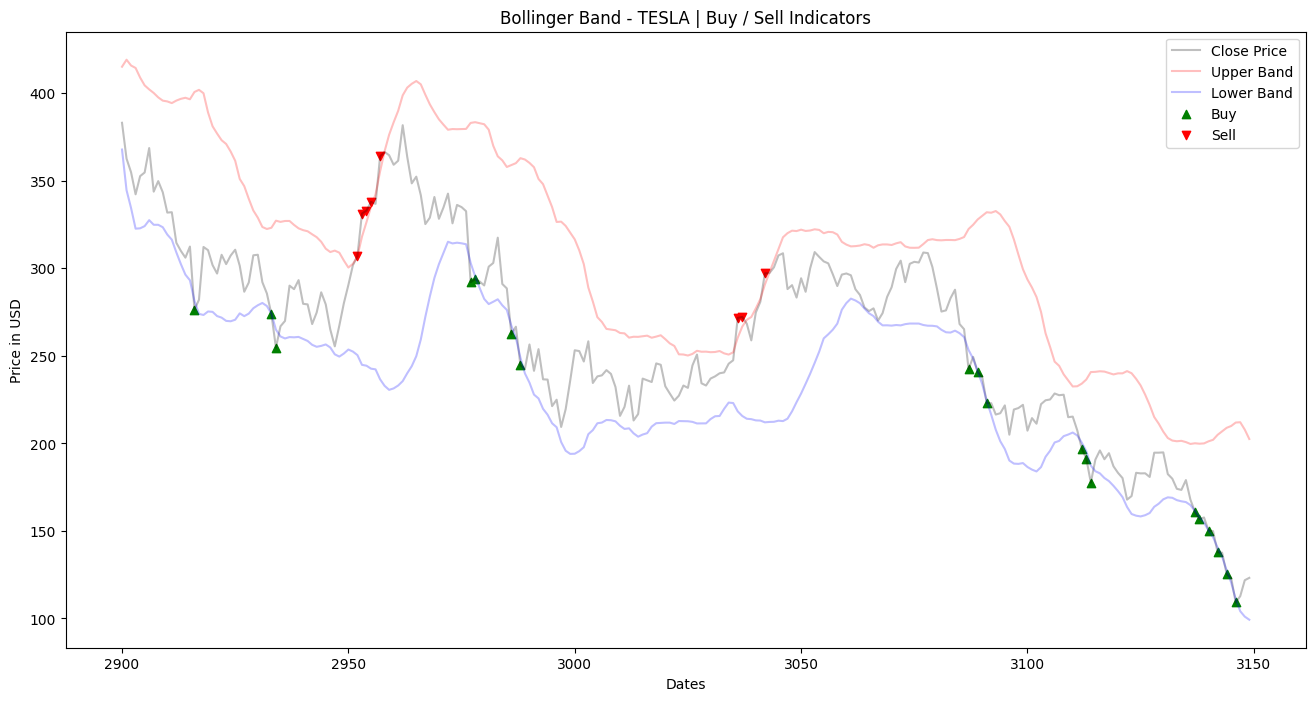

In [ ]:
df_bollinger = df.copy()
df_bollinger = df_bollinger[(df_bollinger['Date'] >= '2022-01-01') & (df_bollinger['Date'] < '2023-01-01')]
df_bollinger['Date'] = pd.to_datetime(df_bollinger['Date'])

# Calculate 20-day moving average and standard deviation
window_size = 20
df_bollinger['MA20'] = df_bollinger['Close'].rolling(window=window_size, min_periods=1).mean().dropna()
df_bollinger['Upper_band'] = df_bollinger['MA20'] + 2 * df_bollinger['Close'].rolling(window=window_size, min_periods=1).std().dropna()
df_bollinger['Lower_band'] = df_bollinger['MA20'] - 2 * df_bollinger['Close'].rolling(window=window_size, min_periods=1).std().dropna()
df_bollinger.dropna(inplace = True)

# Calculate RSI
def calculate_rsi(data, column_name = 'Close', period=14):
    diff = data[column_name].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

df_bollinger['RSI'] = calculate_rsi(df_bollinger)
df_bollinger

buyers = df_bollinger[df_bollinger['Close'] <= df_bollinger['Lower_band']]
sellers = df_bollinger[df_bollinger['Close'] >= df_bollinger['Upper_band']]

fig, ax = plt.subplots(figsize=(16,8))
plt.title(f'Bollinger Band - TESLA | Buy / Sell Indicators')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
ax.plot(df_bollinger['Close'], label = 'Close Price', alpha = 0.25,
                  color = 'black')
ax.plot(df_bollinger['Upper_band'], label = 'Upper Band', alpha = 0.25,
                  color = 'red')
ax.plot(df_bollinger['Lower_band'], label = 'Lower Band', alpha = 0.25,
                  color = 'blue')

ax.scatter(buyers.index, buyers['Close'], label = 'Buy', alpha = 1,
                  marker = '^', color = 'green')
ax.scatter(sellers.index, sellers['Close'], label = 'Sell', alpha = 1,
                  marker = 'v', color = 'red')
plt.legend()
plt.show()